In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
import numpy as np
import modelo_infeccion
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pickle
lista_colores = [(1,1,1), (0.6, 0.6, 0.6), (1, 0, 0)]
cm = LinearSegmentedColormap.from_list("colorinfectados", lista_colores)

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = [8, 5]

saving_figs=True

## Modelo de propagación 2D

In [4]:
nx = 100
ny = 160

In [6]:
mundo = modelo_infeccion.Mundo2d(nx, ny, ocupacion=0.00)

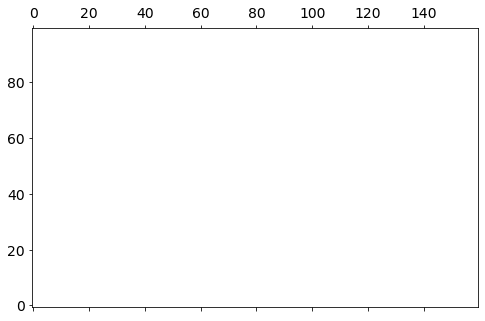

In [7]:
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
if saving_figs:
    plt.savefig('plaza_vacia.png', dpi=300, transparent=True)
plt.show()

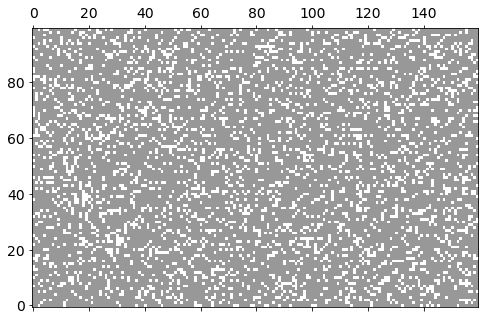

In [8]:
mundo = modelo_infeccion.Mundo2d(nx, ny, ocupacion=0.80)
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
if saving_figs:
    plt.savefig('plaza_ocupacion_80.png', dpi=300, transparent=True)
plt.show()

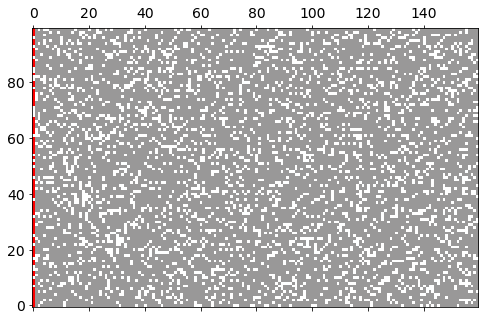

In [9]:
mundo.infeccion_inicial()
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
if saving_figs:
    plt.savefig('plaza_ocupacion_80_inicio.png', dpi=300, transparent=True)
plt.show()

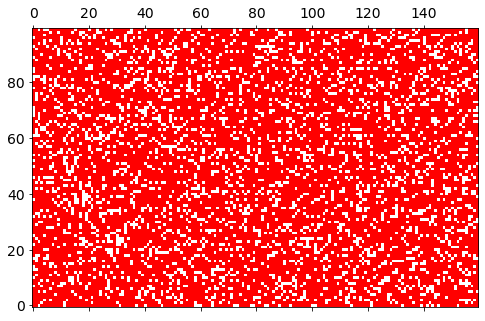

In [10]:
mundo.propagacion()
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
if saving_figs:
    plt.savefig('plaza_ocupacion_80_prop.png', dpi=300, transparent=True)
plt.show()

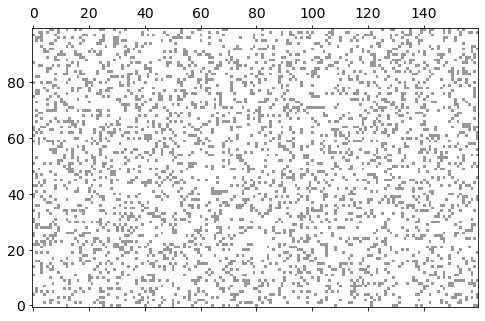

In [11]:
mundo = modelo_infeccion.Mundo2d(nx, ny, ocupacion=0.20)
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
plt.savefig('plaza_ocupacion_20.png', dpi=300, transparent=True)
plt.show()

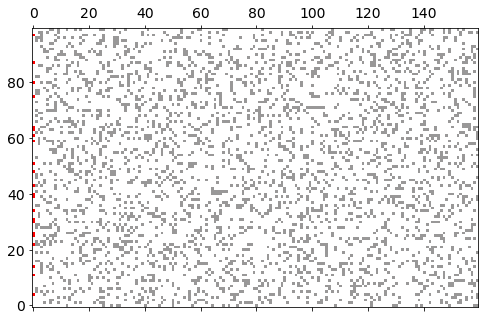

In [12]:
mundo.infeccion_inicial()
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
if saving_figs:
    plt.savefig('plaza_ocupacion_20_inicio.png', dpi=300, transparent=True)
plt.show()

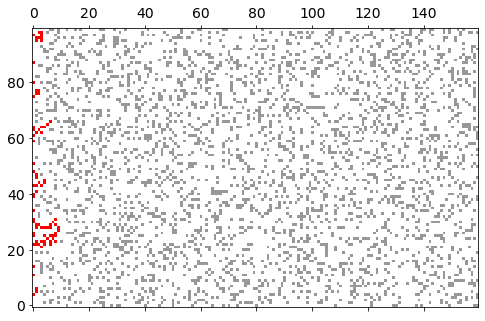

In [13]:
mundo.propagacion()
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
if saving_figs:
    plt.savefig('plaza_ocupacion_20_prop.png', dpi=300, transparent=True)
plt.show()

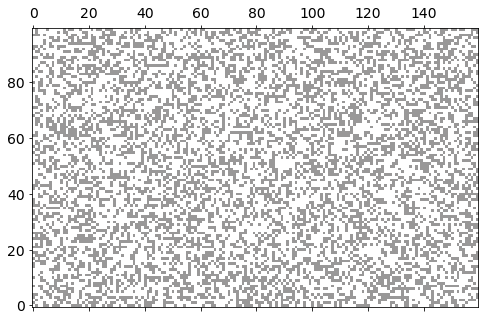

In [14]:
mundo = modelo_infeccion.Mundo2d(nx, ny, ocupacion=0.40)
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
if saving_figs:
    plt.savefig('plaza_ocupacion_40.png', dpi=300, transparent=True)
plt.show()

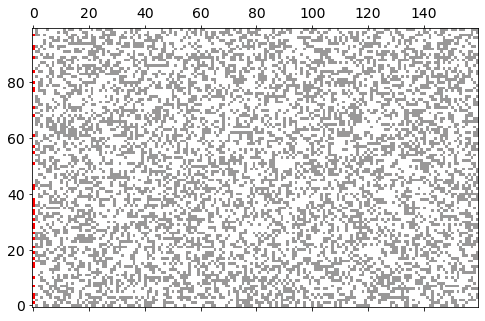

In [15]:
mundo.infeccion_inicial()
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
if saving_figs:
    plt.savefig('plaza_ocupacion_40_inicio.png', dpi=300, transparent=True)
plt.show()

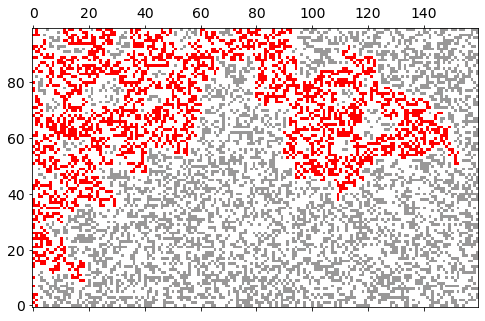

In [16]:
mundo.propagacion()
plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
if saving_figs:
    plt.savefig('plaza_ocupacion_40_prop.png', dpi=300, transparent=True)
plt.show()

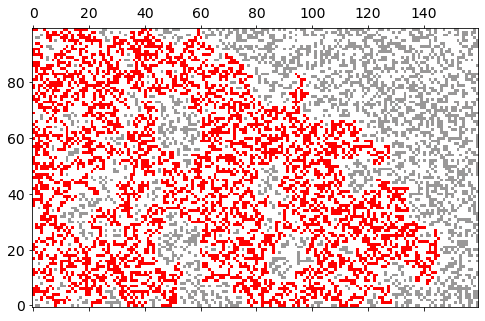

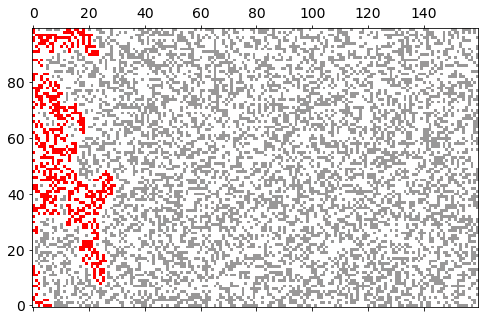

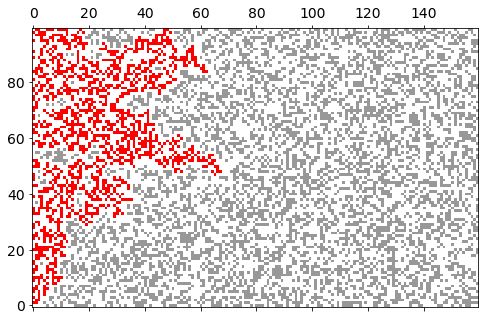

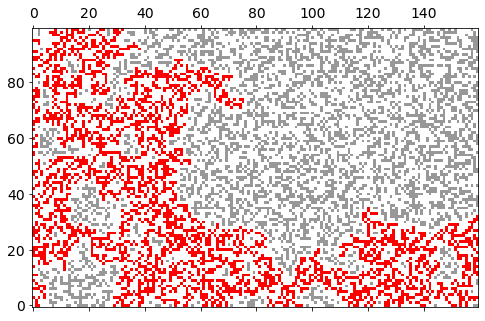

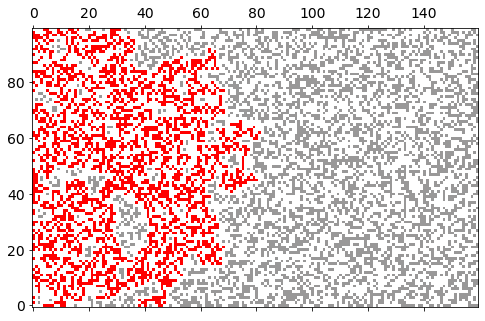

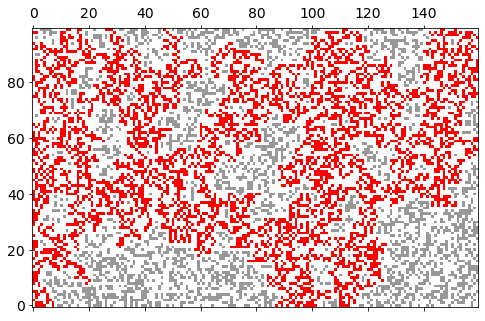

In [17]:
for ii in range(1,7):
    mundo = modelo_infeccion.Mundo2d(nx, ny, ocupacion=0.40)
    mundo.infeccion_inicial()
    mundo.propagacion()
    plt.matshow(mundo.matriz, cmap = cm, vmax=2, origin = "lower")
    plt.savefig('plaza_ocupacion_40_'+str(ii)+'_prop.png', dpi=300, transparent=True)


-----------------------------

In [38]:
ocupaciones = np.hstack([np.linspace(1.0, 0.8, num=3),
                         np.linspace(0.79, 0.41, num=40),
                         np.linspace(0.4, 0.0, num=4)])

In [44]:
n_filas = 100
n_columnas = 200
#ocupaciones = np.linspace(1.0, 0.0, num=15)
ocupaciones = np.hstack([np.linspace(1.0, 0.6, num=4),
                         np.linspace(0.59, 0.21, num=40),
                         np.linspace(0.2, 0.0, num=3)])
n_realizaciones = 200
lista_porcentaje_infectados_promedio = []
lista_numero_vecinos_promedio = []

for ocupacion in ocupaciones:
    
    print(ocupacion)
    lista_porcentaje_infectados = []
    lista_numero_vecinos = []
    
    for _ in range(n_realizaciones):
        
        mundo=modelo_infeccion.Mundo2d(n_filas, n_columnas, ocupacion=ocupacion)
        mundo.infeccion_inicial()
        mundo.propagacion()
        lista_porcentaje_infectados.append(mundo.porcentaje_infectado)
        lista_numero_vecinos.append(mundo.vecinos_promedio)
    
    m = np.mean(lista_porcentaje_infectados)
    lista_porcentaje_infectados_promedio.append(m)

    v = np.mean(lista_numero_vecinos)
    lista_numero_vecinos_promedio.append(v)

1.0
0.8666666666666667
0.7333333333333334
0.6
0.59
0.5802564102564102
0.5705128205128205
0.5607692307692307
0.551025641025641
0.5412820512820512
0.5315384615384615
0.5217948717948717
0.512051282051282
0.5023076923076922
0.49256410256410255
0.4828205128205128
0.47307692307692306
0.46333333333333326
0.4535897435897436
0.4438461538461538
0.4341025641025641
0.4243589743589743
0.4146153846153846
0.4048717948717948
0.3951282051282051
0.3853846153846153
0.37564102564102564
0.36589743589743584
0.3561538461538461
0.34641025641025636
0.3366666666666666
0.32692307692307687
0.31717948717948713
0.3074358974358974
0.29769230769230764
0.2879487179487179
0.27820512820512816
0.2684615384615384
0.2587179487179487
0.24897435897435893
0.2392307692307692
0.22948717948717945
0.2197435897435897
0.21
0.2
0.1
0.0


In [57]:
if False:
    fff = open('data_barrido.oup','wb')
    pickle.dump(ocupaciones,fff)
    pickle.dump(lista_porcentaje_infectados_promedio,fff)
    pickle.dump(lista_numero_vecinos_promedio,fff)
    fff.close()

In [58]:
if False:
    fff = open('data_barrido.oup','rb')
    ooo = pickle.load(fff)
    inf = pickle.load(fff)
    vec = pickle.load(fff)
    fff.close()

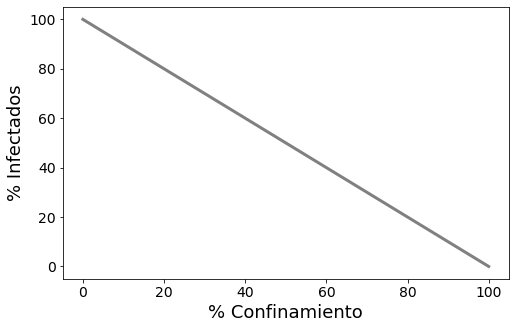

In [73]:
plt.plot([0,100],[100,0], lw=3, c='gray')
plt.ylabel("% Infectados")
plt.xlabel("% Confinamiento")
plt.savefig('infectados_confinamiento_1.png', dpi=300, transparent=True)
plt.show()

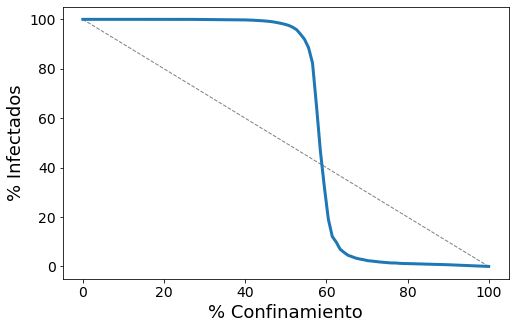

In [74]:
plt.plot([0,100],[100,0], lw=1, ls='--', c='gray')
plt.plot((1-np.array(ocupaciones))*100,np.array(lista_porcentaje_infectados_promedio)*100, lw=3)
#plt.axvline(x=58.5, ymin=0, ymax=100, lw=2, color="red")
plt.ylabel("% Infectados")
plt.xlabel("% Confinamiento")
plt.savefig('infectados_confinamiento_2.png', dpi=300, transparent=True)
plt.show()

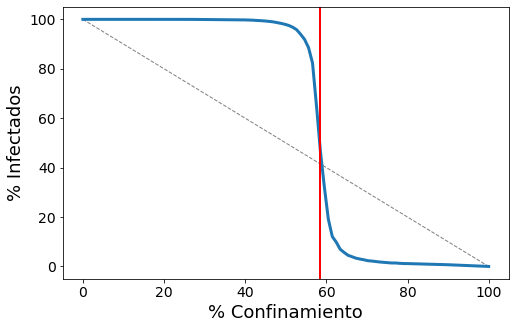

In [83]:
plt.plot([0,100],[100,0], lw=1, ls='--', c='gray')
plt.plot((1-np.array(ocupaciones))*100,np.array(lista_porcentaje_infectados_promedio)*100, lw=3)
plt.axvline(x=58.5, ymin=0, ymax=100, lw=2, color="red")
plt.ylabel("% Infectados")
plt.xlabel("% Confinamiento")
plt.savefig('infectados_confinamiento_3.png', dpi=300, transparent=True)
plt.show()

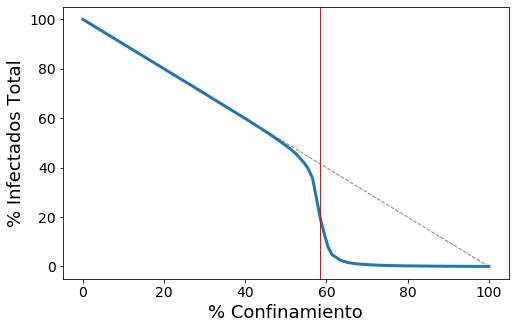

In [82]:
plt.plot([0,100],[100,0], lw=1, ls='--', c='gray')
plt.plot((1-np.array(ocupaciones))*100,
         (np.array(ocupaciones))*np.array(lista_porcentaje_infectados_promedio)*100, lw=3)
plt.axvline(x=58.5, ymin=0, ymax=100, lw=1, color="red")
plt.ylabel("% Infectados Total")
plt.xlabel("% Confinamiento")
plt.savefig('infectados_confinamiento_4.png', dpi=300, transparent=True)
plt.show()

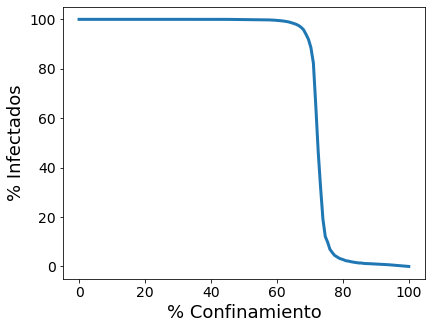

In [97]:
plt.rcParams['figure.figsize'] = [6.5, 5]
plt.plot(100*(1-np.array(ocupaciones))**0.6, np.array(lista_porcentaje_infectados_promedio)*100, lw=3)
plt.ylabel("% Infectados")
plt.xlabel("% Confinamiento")
plt.savefig('infectados_confinamiento_5.png', dpi=300, transparent=True)
plt.show()

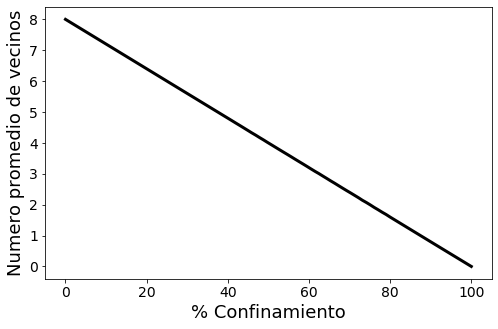

In [78]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot((1-np.array(ocupaciones))*100,np.array(lista_numero_vecinos_promedio), c='k', lw=3)
plt.ylabel("Numero promedio de vecinos")
plt.xlabel("% Confinamiento")
plt.savefig('vecinos_confinamiento.png', dpi=300, transparent=True)
plt.show()